# 03 – Resultados y Análisis

Este notebook presenta el análisis comparativo de los modelos entrenados
(SVM, Random Forest y XGBoost) sobre el dataset procesado de actividades humanas.

Incluye:
- Comparación de métricas (precision, recall, F1)
- Visualización de matrices de confusión
- Importancia de características (RF/XGB)
- Conclusiones y elección del modelo final


## Cargar dependencias y rutas

In [2]:
import os, json, pandas as pd
from IPython.display import Image, display

# Asegurar acceso a raíz del repo
import sys
sys.path.append(os.path.abspath(os.path.join("..", "..")))

from dotenv import load_dotenv
load_dotenv()

RESULTS_DIR = os.getenv("RESULTS_DIR", "../experiments/results")
MODELS_DIR  = os.getenv("MODELS_DIR",  "../experiments/models")

print("Carpetas de resultados y modelos:")
print(RESULTS_DIR)
print(MODELS_DIR)


Carpetas de resultados y modelos:
../experiments/results
../experiments/models


## Cargar los reportes y resumen

In [3]:
def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

svm_rep = load_json(os.path.join(RESULTS_DIR, "svm_report.json"))
rf_rep  = load_json(os.path.join(RESULTS_DIR, "rf_report.json"))
xgb_rep = load_json(os.path.join(RESULTS_DIR, "xgb_report.json"))

summary_path = os.path.join(RESULTS_DIR, "models_summary.json")
with open(summary_path, "r", encoding="utf-8") as f:
    summary = json.load(f)

print("Resumen (F1-macro):")
for k, v in summary.items():
    print(f"{k}: {v:.3f}")


Resumen (F1-macro):
svm: 0.740
rf: 0.623
xgb: 0.666


## Métricas por clase

In [4]:
def to_df(rep):
    rows=[]
    for k,v in rep.items():
        if isinstance(v, dict) and "precision" in v:
            rows.append({"label": k, **v})
    return pd.DataFrame(rows)

svm_df = to_df(svm_rep)
rf_df  = to_df(rf_rep)
xgb_df = to_df(xgb_rep)

display(svm_df.round(3))
display(rf_df.round(3))
display(xgb_df.round(3))


,label,precision,recall,f1-score,support
0,caminar,0.900,0.818,0.857,11.0
1,girar,0.571,0.800,0.667,5.0
2,ponerse_de_pie,0.714,0.833,0.769,6.0
3,sentarse,0.800,0.571,0.667,7.0
4,macro avg,0.746,0.756,0.740,29.0
5,weighted avg,0.781,0.759,0.760,29.0


,label,precision,recall,f1-score,support
0,caminar,0.714,0.909,0.800,11.0
1,girar,0.333,0.200,0.250,5.0
2,ponerse_de_pie,0.800,0.667,0.727,6.0
3,sentarse,0.714,0.714,0.714,7.0
4,macro avg,0.640,0.623,0.623,29.0
5,weighted avg,0.666,0.690,0.669,29.0


,label,precision,recall,f1-score,support
0,caminar,0.786,1.000,0.880,11.0
1,girar,1.000,0.400,0.571,5.0
2,ponerse_de_pie,0.556,0.833,0.667,6.0
3,sentarse,0.750,0.429,0.545,7.0
4,macro avg,0.773,0.665,0.666,29.0
5,weighted avg,0.766,0.724,0.702,29.0


## Visualizar matrices de confusión

Matriz de confusión - SVM


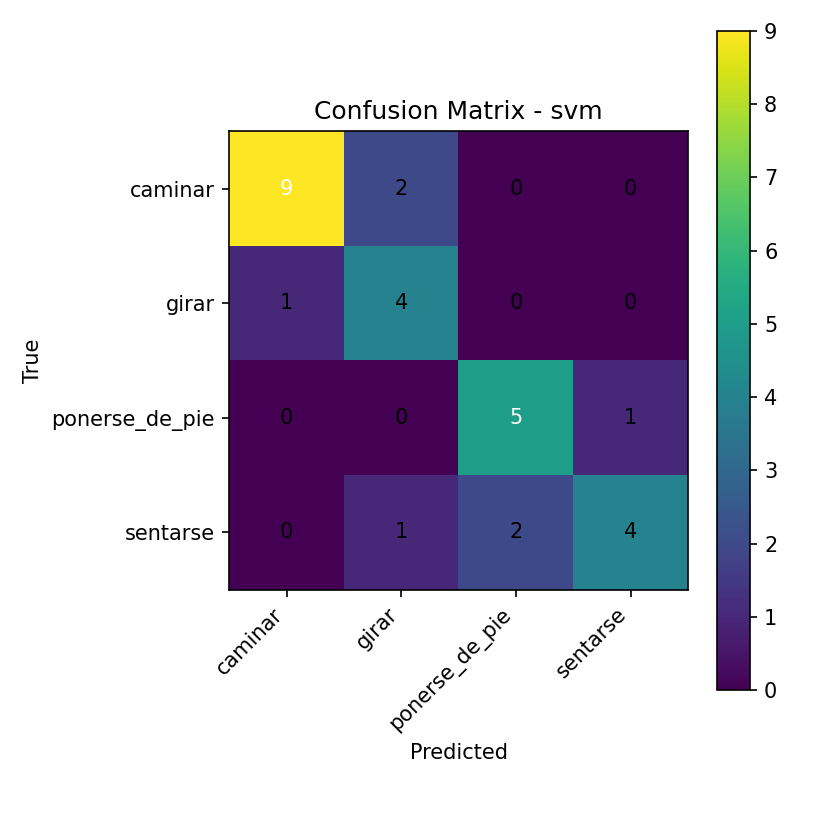

Matriz de confusión - RF


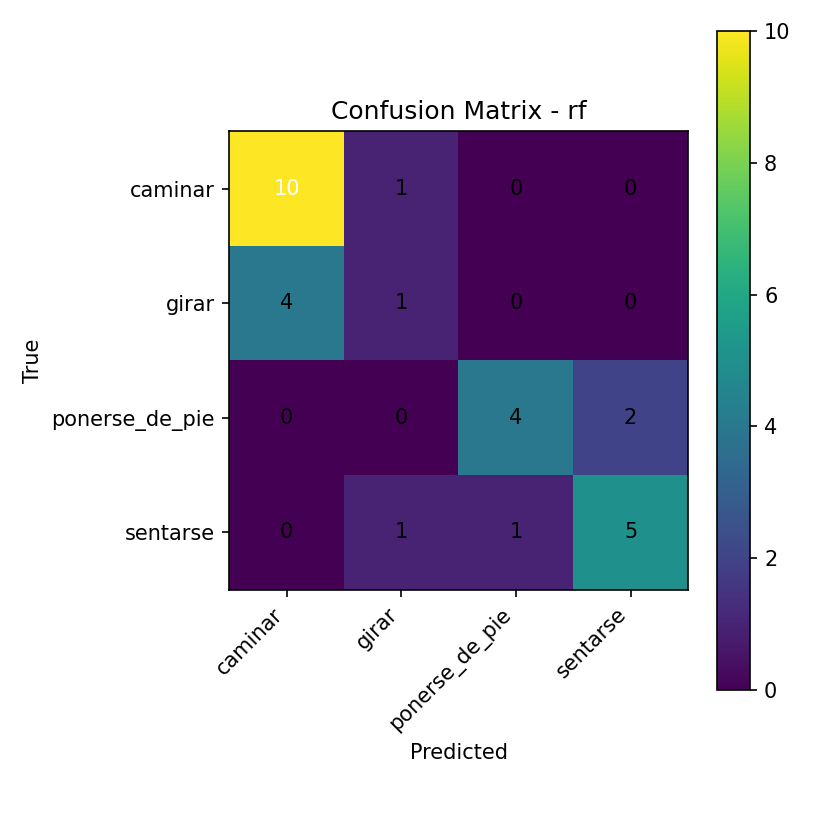

Matriz de confusión - XGB


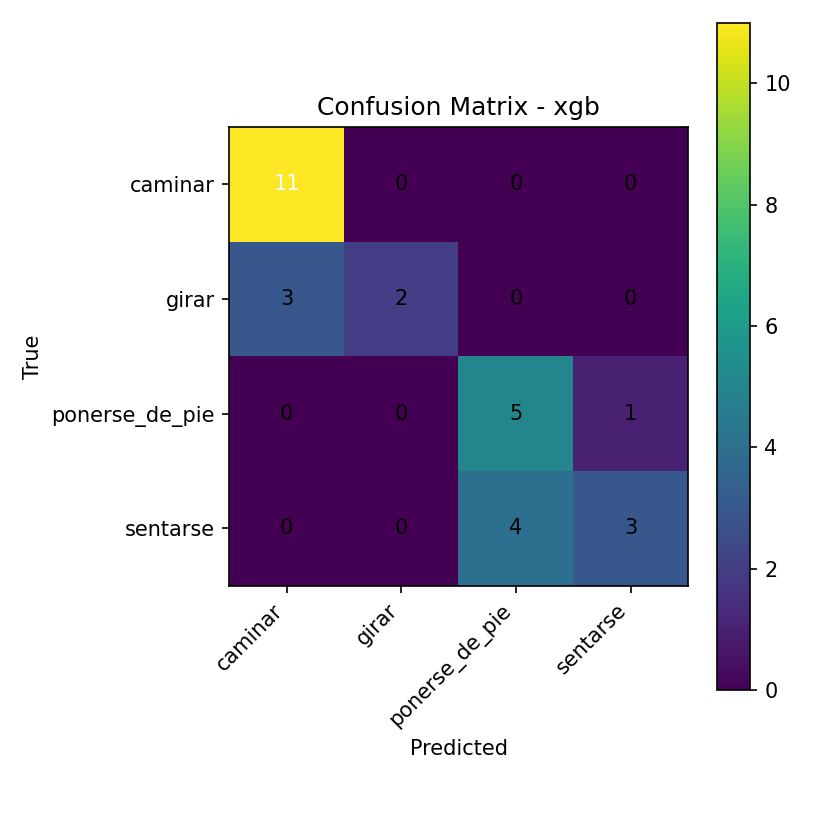

In [5]:
for name in ["svm","rf","xgb"]:
    png = os.path.join(RESULTS_DIR, f"{name}_confusion_matrix.png")
    if os.path.exists(png):
        print(f"Matriz de confusión - {name.upper()}")
        display(Image(filename=png))


## Visualizar importancias (RF y XGB)

Importancias de features - RF


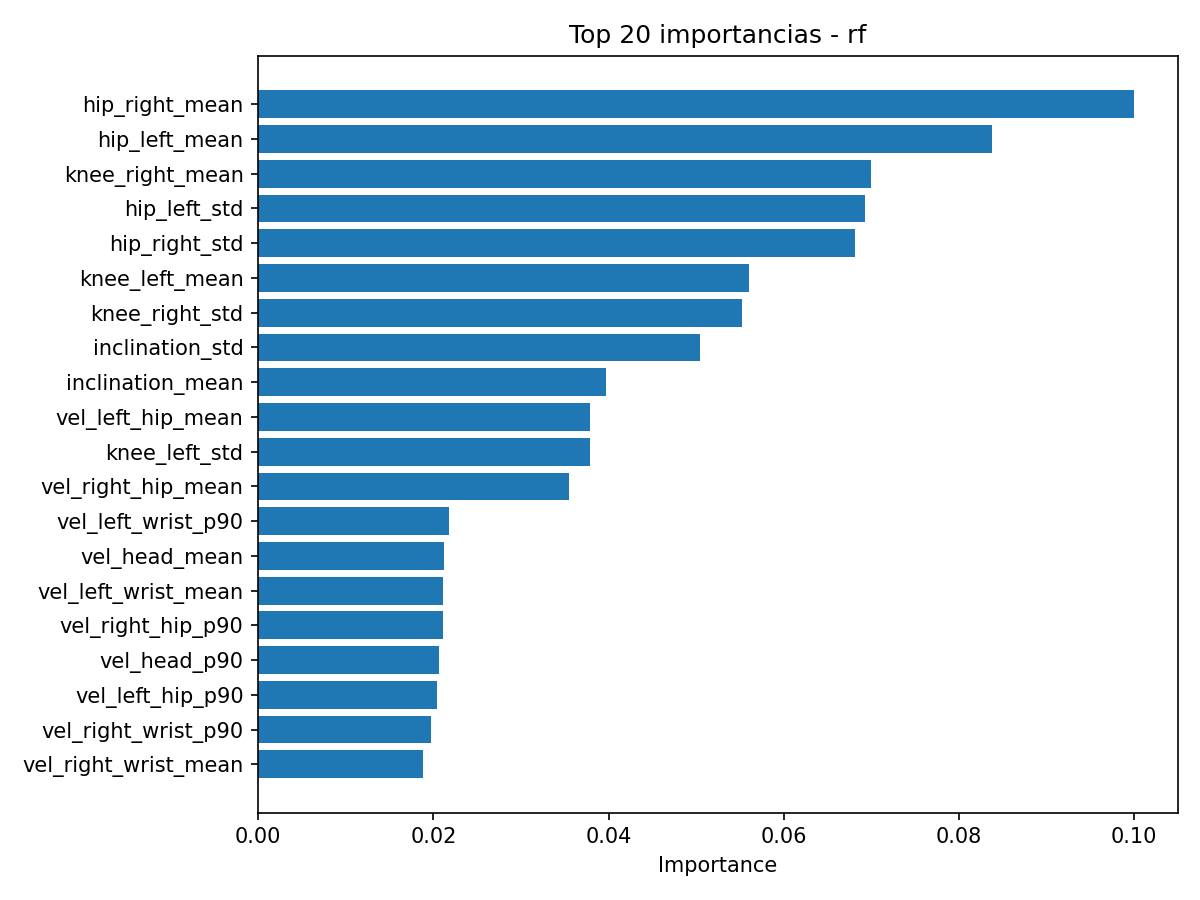

Importancias de features - XGB


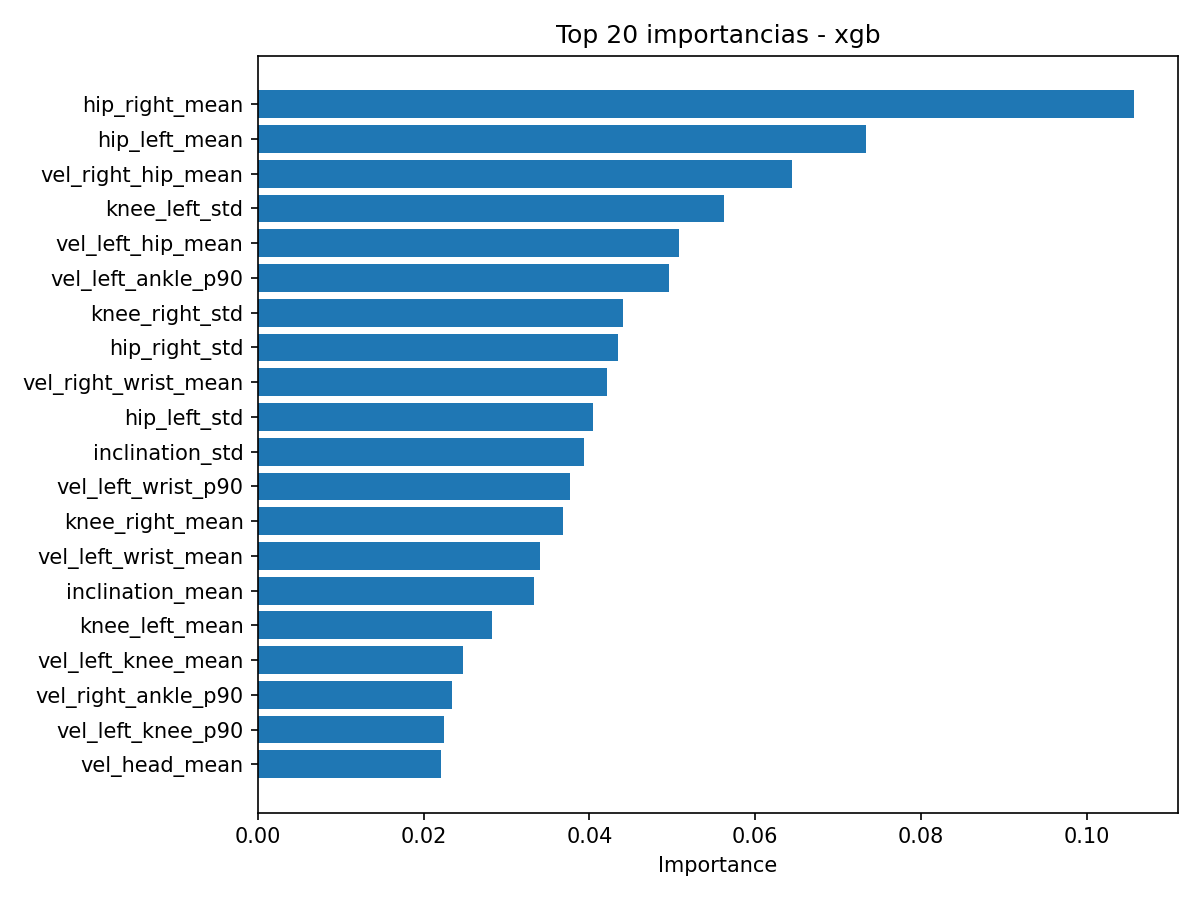

In [6]:
for name in ["rf","xgb"]:
    png = os.path.join(RESULTS_DIR, f"{name}_feature_importance_top20.png")
    if os.path.exists(png):
        print(f"Importancias de features - {name.upper()}")
        display(Image(filename=png))


## Análisis de Resultados

- **Comparación global**:

- **Por clase**:

- **Matrices de confusión**:

- **Importancia de características**:


## Conclusiones finales


## Próximos pasos (para Entrega 3)

- Integrar el modelo (ESCRIBIR AQUI MODELO ELEGIDO) entrenado (`modelo_best.joblib`) con MediaPipe en una interfaz en tiempo real.
- Implementar visualización de predicciones sobre el video.
- Validar con nuevas personas y diferentes condiciones de iluminación.
